<a href="https://colab.research.google.com/github/StanleyLiangYork/2024_journal_club_Transformer_AI/blob/main/embedding_positional_encode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this demo notebook, we show the pipeline from text tokenization, word embedding, and adding positional encoding to the word embedding to build the numeric representations of the input text.

# 1 Text Vectorization

After data cleaning, we are about to send to text to the computer. The process will convert the words to numeric vectors following certain rules.

We will use the TensorFlow Keras API to perform this process. In the following example, we will try to vectorize two sentences.


*   I like transformer for AI
*   You like transformer movies



In [ ]:
import tensorflow as tf
from tensorflow import convert_to_tensor
from tensorflow.keras.layers import TextVectorization
from tensorflow.data import Dataset

output_sequence_length = 5
vocab_size = 10 # because we have 7 unique words, a vocabulary size of 10 is enough

sentences = [["I like transformer for A."], ["You like transformer movies."]]
sentence_data = Dataset.from_tensor_slices(sentences)

# the Dataset object is a generator function to fetch data
data_point = next(iter(sentence_data))
print(data_point)

tf.Tensor([b'I like transformer for A'], shape=(1,), dtype=string)


In [ ]:
# Create the TextVectorization layer
vectorize_layer = TextVectorization(output_sequence_length=output_sequence_length,
                                    max_tokens=vocab_size)

# Train the layer to create a dictionary
vectorize_layer.adapt(sentence_data)

# Convert all sentences to tensors
word_tensors = convert_to_tensor(sentences, dtype=tf.string)

# Use the word tensors to get vectorized phrases
vectorized_words = vectorize_layer(word_tensors)
print("Vocabulary: ", vectorize_layer.get_vocabulary(), f"total length of vocabulary: {len(vectorize_layer.get_vocabulary())}")
print("you can see that the tokens only include words in TensorFlow")
print("Vectorized words: ", vectorized_words[0])
print("the numbers are the vocabulary indices")

Vocabulary:  ['', '[UNK]', 'transformer', 'like', 'you', 'movies', 'i', 'for', 'a'] total length of vocabulary: 9
you can see that the tokens only include words in TensorFlow
Vectorized words:  tf.Tensor([6 3 2 7 8], shape=(5,), dtype=int64)
the numbers are the vocabulary indices


2 Vector to word embedding

We use the Keras Embedding layer to convert the word integer indices to dense vectors. Word embedding is a shallow network to map the indices to a vector with fixed dimension, which represents the similarity of the text.

In [ ]:
from tensorflow.keras.layers import Embedding

output_length = 4 # we map a sequence of 5 to a word embedding of 4

# Create an Embedding layer
word_embedding_layer = Embedding(vocab_size, output_length)
embedded_words = word_embedding_layer(vectorized_words)
print("word embedding for 'I like transformer for A.'")
print(embedded_words[0])
print()
print("word embedding for 'You like transformer movies.'")
print(embedded_words[1])
embed_1 = embedded_words[0]
embed_2 = embedded_words[1]


word embedding for 'I like transformer for A.'
tf.Tensor(
[[ 0.01649566  0.01579009  0.02546985  0.02437569]
 [-0.00217835 -0.03769909 -0.02639313 -0.03361668]
 [-0.04453452  0.03663423  0.02534889 -0.02998656]
 [ 0.01726962  0.04845453 -0.00604462 -0.00385002]
 [ 0.00604017 -0.04431595  0.01222227 -0.04144819]], shape=(5, 4), dtype=float32)

word embedding for 'You like transformer movies.'
tf.Tensor(
[[ 0.04963252  0.01079917  0.01240839 -0.0271549 ]
 [-0.00217835 -0.03769909 -0.02639313 -0.03361668]
 [-0.04453452  0.03663423  0.02534889 -0.02998656]
 [ 0.03950762 -0.02748002 -0.02822621 -0.02210274]
 [ 0.00316463  0.02864688 -0.02418419 -0.02352774]], shape=(5, 4), dtype=float32)


In [ ]:
position_embedding_layer = Embedding(output_sequence_length, output_length)
position_indices = tf.range(output_sequence_length)
embedded_indices = position_embedding_layer(position_indices)
print(embedded_indices)

tf.Tensor(
[[ 0.0366757  -0.04132217  0.02714071 -0.00478549]
 [ 0.00205923 -0.04976795  0.04320231  0.0462178 ]
 [ 0.02623284 -0.04074157  0.01225953  0.01377899]
 [-0.03114364 -0.00439594  0.0301802   0.04171369]
 [-0.02724293 -0.04023157  0.029333   -0.04260156]], shape=(5, 4), dtype=float32)


In [ ]:
position_indices

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 2, 3, 4], dtype=int32)>

To add positional encoding to the word embeddings, we can sum the word embeddings and the position embeddings.

As shown above, we can utilize the Embedding layer of Keras to create a Embedding object by setting up the input and output dimension, then we load the input indices to the Embedding layer, and it will encode the input to the target embedding vectors that have the same dimension as the word embedding. Therefore, we can sum them up.

In [ ]:
# since we use the same embedding layer, the outputs have the identical dimensionality
final_output_embedding = embedded_words + embedded_indices
print("Final output: ", final_output_embedding)

Final output:  tf.Tensor(
[[[ 0.05317136 -0.02553208  0.05261056  0.0195902 ]
  [-0.00011912 -0.08746704  0.01680919  0.01260113]
  [-0.01830167 -0.00410734  0.03760842 -0.01620757]
  [-0.01387403  0.04405859  0.02413559  0.03786367]
  [-0.02120277 -0.08454752  0.04155527 -0.08404975]]

 [[ 0.08630822 -0.030523    0.0395491  -0.03194039]
  [-0.00011912 -0.08746704  0.01680919  0.01260113]
  [-0.01830167 -0.00410734  0.03760842 -0.01620757]
  [ 0.00836398 -0.03187596  0.00195399  0.01961095]
  [-0.02407831 -0.0115847   0.00514881 -0.0661293 ]]], shape=(2, 5, 4), dtype=float32)


# 3 - combine word embedding and positional embedding

So we can write the above word embeddings and positional embedding into a new class named positional embedding layer, which can do both word embedding and positional embedding.

We will implement the sine and cosine functions to the positional embedding later.

In [2]:
import tensorflow as tf
from tensorflow import convert_to_tensor, string
from tensorflow.keras.layers import TextVectorization, Embedding, Layer
from tensorflow.data import Dataset
import numpy as np
import matplotlib.pyplot as plt

output_sequence_length = 5 # the token vector length
output_length = 4 # the word embedding length
vocab_size = 10

sentences = [["I like transformer for A."], ["You like transformer movies."]]
sentence_data = Dataset.from_tensor_slices(sentences)

# word --> integer numeric tokens
vectorize_layer = TextVectorization(output_sequence_length=output_sequence_length, max_tokens=vocab_size)
# Train the layer to create a dictionary
vectorize_layer.adapt(sentence_data)
# Convert all sentences to tensors -- as input tensor for the vectorize layer
word_tensors = convert_to_tensor(sentences, dtype=tf.string)
# Use the word tensors to get vectorized phrases
vectorized_words = vectorize_layer(word_tensors)

print(vectorized_words)

tf.Tensor(
[[6 3 2 7 8]
 [4 3 2 5 0]], shape=(2, 5), dtype=int64)


In [3]:
class PositionEmbeddingLayer(Layer):
    # define the constructor
    def __init__(self, seq_length, vocab_size, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.word_embedding_layer = Embedding(input_dim=vocab_size, output_dim=output_dim)
        self.position_embedding_layer = Embedding(input_dim=seq_length, output_dim=output_dim)

    # the custom call method, the call method will do the processing when an object is created
    def call(self, inputs):
        position_indices = tf.range(tf.shape(inputs)[-1])
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.position_embedding_layer(position_indices)
        return embedded_words + embedded_indices

In [4]:
# create the positional + word embedding layer
custom_embedding_layer = PositionEmbeddingLayer(output_sequence_length, vocab_size, output_length)
embedded_layer_output = custom_embedding_layer(vectorized_words)
print("Output from custom_embedded_layer: ", embedded_layer_output)

Output from custom_embedded_layer:  tf.Tensor(
[[[-0.00380678  0.00208563 -0.02357931 -0.03710254]
  [ 0.05882748 -0.0311981  -0.05575901  0.0094553 ]
  [ 0.02231822 -0.01596844 -0.02795559  0.01843645]
  [-0.05834459  0.0131742   0.01238996 -0.04256581]
  [ 0.00080627 -0.01387829 -0.02629715  0.01510316]]

 [[ 0.01207545  0.00369031 -0.02263095 -0.03031536]
  [ 0.05882748 -0.0311981  -0.05575901  0.0094553 ]
  [ 0.02231822 -0.01596844 -0.02795559  0.01843645]
  [-0.06400754 -0.02763527  0.0380559   0.03393208]
  [-0.01415101 -0.0150631  -0.04899985  0.02097845]]], shape=(2, 5, 4), dtype=float32)


# 4 Add the sinusoidal function to positional encoding

Note the the above implementation uses the Embedding layer from Keras, thus the encoding weights are random. To get static positional encodings to the words, we need to add the sinusoidal functions to the class. We call this class "PositionEmbeddingFixedWeights"

In [10]:
output_sequence_length = 5 # the token vector length
output_length = 4 # the word embedding length
vocab_size = 10

sentences = [["I like transformer for A."], ["You like transformer movies."]]
sentence_data = Dataset.from_tensor_slices(sentences)

# Create the TextVectorization layer
vectorize_layer = TextVectorization(output_sequence_length=output_sequence_length, max_tokens=vocab_size)
# Train the layer to create a dictionary
vectorize_layer.adapt(sentence_data)
# Convert all sentences to tensors
word_tensors = convert_to_tensor(sentences, dtype=tf.string)
# Use the word tensors to get vectorized phrases
vectorized_words = vectorize_layer(word_tensors)

class PositionEmbeddingFixedWeights(Layer):
    def __init__(self, seq_length, vocab_size, output_dim, **kwargs):
        super().__init__(**kwargs)
        word_embedding_matrix = self.get_position_encoding(vocab_size, output_dim)
        pos_embedding_matrix = self.get_position_encoding(seq_length, output_dim)
        # to let the positional encoding fixed, we set the layer untrainable
        # Note that we use the transformer block architecture to learn the semantic features, the embedding layer does not need to learn
        self.word_embedding_layer = Embedding(input_dim=vocab_size, output_dim=output_dim, weights=[word_embedding_matrix], trainable=False)
        self.position_embedding_layer = Embedding(input_dim=seq_length, output_dim=output_dim,weights=[pos_embedding_matrix],trainable=False)

    def get_position_encoding(self, seq_len, d, n=10000):
        P = np.zeros((seq_len, d))
        for k in range(seq_len):
            for i in np.arange(int(d/2)):
                denominator = np.power(n, 2*i/d)
                P[k, 2*i] = np.sin(k/denominator)
                P[k, 2*i+1] = np.cos(k/denominator)
        return P


    def call(self, inputs):
        position_indices = tf.range(tf.shape(inputs)[-1])
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.position_embedding_layer(position_indices)
        return embedded_words + embedded_indices

sinusoid_embedding = PositionEmbeddingFixedWeights(output_sequence_length, vocab_size, output_length)
sinusoid_output = sinusoid_embedding(vectorized_words)
print("Output from my_embedded_layer: ", sinusoid_output)

Output from my_embedded_layer:  tf.Tensor(
[[[-0.2794155   1.9601703   0.059964    1.9982005 ]
  [ 0.982591   -0.44969022  0.03999534  1.9995    ]
  [ 1.8185948  -0.8322937   0.03999733  1.9996    ]
  [ 0.7981066  -0.23609024  0.09993835  1.9971011 ]
  [ 0.23255575 -0.7991437   0.11990403  1.9960018 ]]

 [[-0.7568025   0.3463564   0.03998933  1.9992001 ]
  [ 0.982591   -0.44969022  0.03999534  1.9995    ]
  [ 1.8185948  -0.8322937   0.03999733  1.9996    ]
  [-0.8178043  -0.7063303   0.07997467  1.9983003 ]
  [-0.7568025   0.3463564   0.03998933  1.9992001 ]]], shape=(2, 5, 4), dtype=float32)


# 5 Visualize the positional embeddings

In [6]:
# we use longer text for the visualization

technical_phrase = "to understand machine learning algorithms you need" +\
                   " to understand concepts such as gradient of a function "+\
                   "Hessians of a matrix and optimization etc"
wise_phrase = "patrick henry said give me liberty or give me death "+\
              "when he addressed the second virginia convention in march"

In [9]:
total_vocabulary = 200 # the vocabulary size can be greater than the actually size
seq_length = 20
final_output_len = 50

phrase_vectorization_layer = TextVectorization(output_sequence_length=seq_length,max_tokens=total_vocabulary)
# Learn the dictionary
phrase_vectorization_layer.adapt([technical_phrase, wise_phrase])
# Convert all sentences to tensors
phrase_tensors = convert_to_tensor([technical_phrase, wise_phrase], dtype=tf.string)
# Use the word tensors to get vectorized phrases
vectorized_phrases = phrase_vectorization_layer(phrase_tensors)

In [13]:
random_embedding_layer = PositionEmbeddingLayer(seq_length, total_vocabulary, final_output_len)
sinusoid_embedding = PositionEmbeddingFixedWeights(seq_length, total_vocabulary, final_output_len)

In [14]:
random_embedding_output = random_embedding_layer(vectorized_phrases)
sinusoid_embedding_output = sinusoid_embedding(vectorized_phrases)

Visualize the random embedding

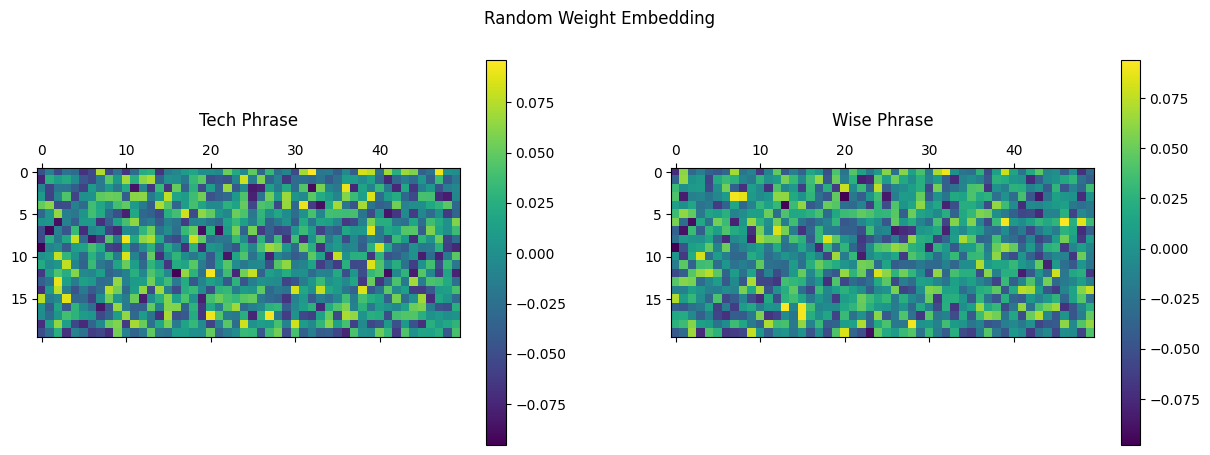

In [17]:
fig = plt.figure(figsize=(15, 5))
title = ["Tech Phrase", "Wise Phrase"]
for i in range(2):
    ax = plt.subplot(1, 2, 1+i)
    matrix = tf.reshape(random_embedding_output[i, :, :], (seq_length, final_output_len))
    cax = ax.matshow(matrix)
    plt.gcf().colorbar(cax)
    plt.title(title[i], y=1.2)
fig.suptitle("Random Weight Embedding")
plt.show()

Visualize the sinusoidal embedding

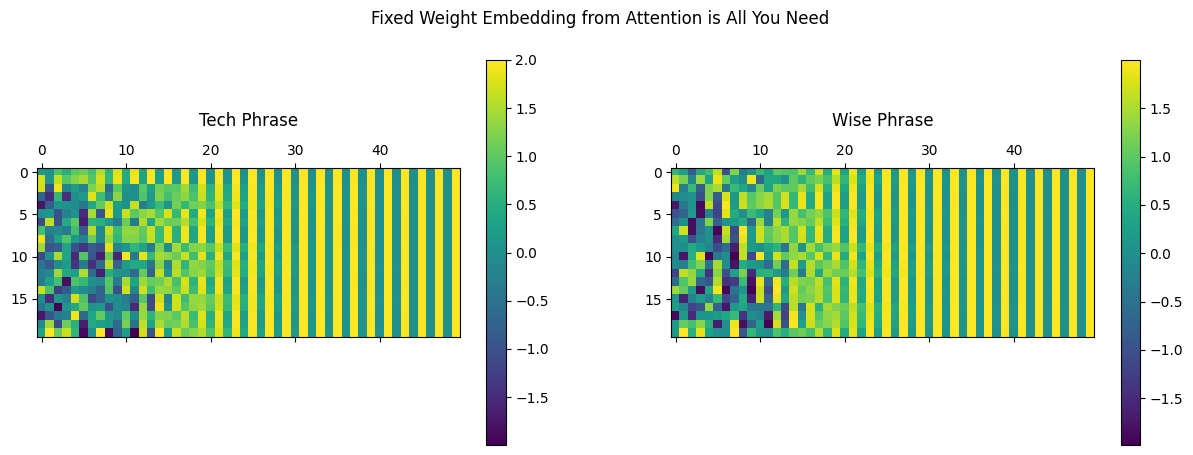

In [15]:
fig = plt.figure(figsize=(15, 5))
title = ["Tech Phrase", "Wise Phrase"]
for i in range(2):
    ax = plt.subplot(1, 2, 1+i)
    matrix = tf.reshape(sinusoid_embedding_output[i, :, :], (seq_length, final_output_len))
    cax = ax.matshow(matrix)
    plt.gcf().colorbar(cax)
    plt.title(title[i], y=1.2)
fig.suptitle("Fixed Weight Embedding from Attention is All You Need")
plt.show()